In [1]:
from contrast_model.Chord import Chord as VectorModel
from contrast_model.Chord import eNote
from pychord import Chord
import pandas as pd
import h5.hdf5_getters as h5
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as ticker

In [2]:
def map_music21(chord_21,name):
    map_21 = {'A': eNote.A,
              'D': eNote.D,
              'G': eNote.G,
              'C': eNote.C,
              'F': eNote.F,
              'Bb': eNote.Bb,
              'A#': eNote.Bb,
              'Eb': eNote.Eb,
              'D#': eNote.Eb,
              'G#': eNote.Ab,
              'Ab': eNote.Ab,
              'C#': eNote.Db,
              'Db': eNote.Db,
              'F#': eNote.Fsharp,
              'Gb': eNote.Fsharp,
              'B': eNote.B,
              'E': eNote.E}
    temp = []
    for i in chord_21:
        temp.append(map_21[i])

    return VectorModel(temp,name=name)

def getChordVectorsFromFile(PATH_CHORD):
    chords = []
    with open(PATH_CHORD, 'r') as file:
        lines = file.readlines()
        for line in lines:
            # Skip the line if it starts with '#'
            if line.startswith("#"):
                continue
            parts = line.strip().split("\t")
            if len(parts) == 3:
                start, end, chord_str = parts
                # SKIP NONE CHORD
                if chord_str in ["N", "None"]: continue
                chord_str = chord_str.replace(":", "")
                c = Chord(chord_str)
                notes = c.components()
                v = map_music21(notes, chord_str)
                chords.append({
                    "chord":v,
                    "start":start,
                    "end":end,
                })
    return chords


    chord_name  chord_theta   start  end
0        F#min        305.0    3.64  4.0
1        F#min        305.0    4.14  1.0
2        F#min        305.0    4.66  2.0
3        F#min        305.0    5.18  3.0
4        F#min        305.0    5.69  4.0
..         ...          ...     ...  ...
450       Bmin        335.0  233.64  4.0
451       Emaj        295.0  234.15  1.0
452       Emaj        295.0  234.66  2.0
453       Emaj        295.0  235.17  3.0
454       Emaj        295.0  235.68  4.0

[455 rows x 4 columns]


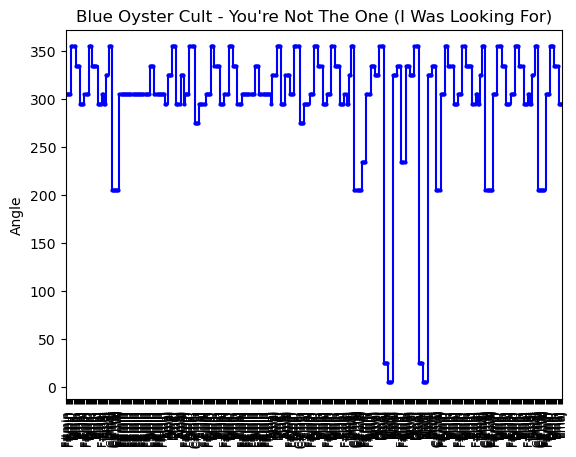

In [4]:
ARTIST = "blue_oyster_cult"
SONG_ID = "TRPSSSL128F4267C28"
# Chord File
# PATH_CHORD = "/Users/nurupo/Desktop/dev/Music-Outlier-Browser/dataset/data/{}/chord/{}_transposed.lab".format(
#     ARTIST, SONG_ID)
PATH_CHORD = "/Users/nurupo/Desktop/dev/Music-Outlier-Browser/music/final_countdown.mp3.lab"
PATH_FILE = "/Users/nurupo/Desktop/dev/Music-Outlier-Browser/dataset/data/{}/h5/{}.h5".format(ARTIST, SONG_ID)
chords = getChordVectorsFromFile(PATH_CHORD)
chord_name_ls = []
chord_theta_ls = []
chord_start_ls = []
chord_end_ls = []
# Loop through Chords
for c in chords:
    chord_name_ls.append(c["chord"].name)
    chord_theta_ls.append(c["chord"].temp_theta)
    chord_start_ls.append(c["start"])
    chord_end_ls.append(c["end"])

df = pd.DataFrame({
    'chord_name': chord_name_ls,
    'chord_theta': chord_theta_ls,
    'start': chord_start_ls,
    'end': chord_end_ls
})
print(df)
# Plot

song = h5.open_h5_file_read(PATH_FILE)
title = h5.get_title(song).decode('utf-8')
artist = h5.get_artist_name(song).decode('utf-8')

x_values = range(len(df))
plt.figure(figsize=(30, 4))
plt.subplot(1, 1, 1)
plt.plot(x_values, df['chord_theta'], marker='o', color='b', drawstyle='steps-post', markersize=2)
plt.title("{} - {}".format(artist, title))
plt.ylabel('Angle')
plt.xticks(x_values, df['chord_name'], rotation='vertical', fontsize=8)
plt.xlim(left=0, right=max(x_values))
plt.show()
